In [1]:
import sys
sys.path.append('./')

import random

from Analyzation_relative import Data_process as DP
from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from sklearn.datasets import load_wine

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

In [2]:
df = pd.read_csv('data/wine/winequality-white-nan.csv' , index_col=0)
# indexlist = list(np.arange(4898))
# for i in range(12):
#     random.shuffle(indexlist)
#     k = random.sample(list(np.arange(30 , 51)) , 1)[0]
#     nan_index = random.sample(indexlist , k)
#     df.iloc[nan_index , i] = pd.N
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0


In [3]:
# indexlist , nan_df = DP.Nan_CountAndPlot(df , plot = False)
# df.loc[indexlist]

In [3]:
df_withNan , df_pro = DP.Nan_process(df , plot = False , numeric = 'median' , subtype='backward')

In [5]:
#df_withNan

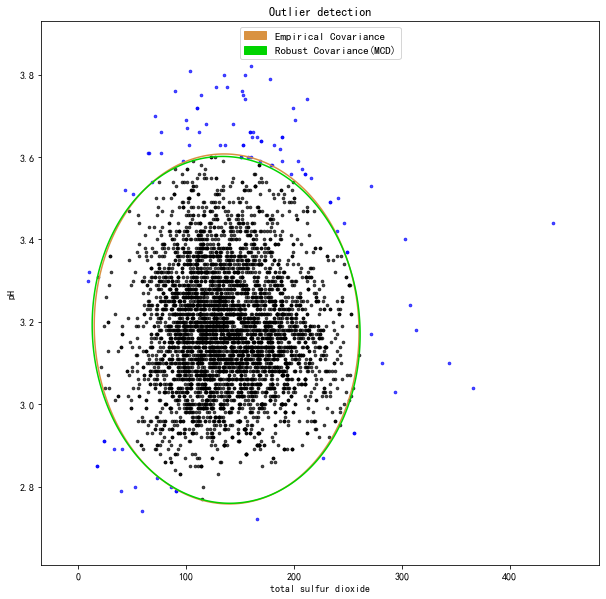

In [4]:
outer_index1 , type_index1 , temp1 = DP.Outlier_TreatAndPlot(df_pro[['fixed acidity']])
outer_index2 , type_index2 , temp2 = DP.Outlier_TreatAndPlot(df_pro[['total sulfur dioxide' , 'pH']])

In [10]:
outer_index1 , outer_index2[0]

(Int64Index([  98,  169,  207,  294,  358,  551,  555,  656,  774,  847,
             ...
             4259, 4446, 4470, 4518, 4522, 4679, 4786, 4787, 4792, 4847],
            dtype='int64', length=116),
 array([  72,  130,  182,  191,  245,  250,  320,  325,  444,  519,  566,
         763,  830,  834, 1014, 1043, 1078, 1120, 1214, 1250, 1255, 1263,
        1335, 1352, 1385, 1417, 1482, 1487, 1508, 1575, 1608, 1649, 1653,
        1663, 1681, 1688, 1707, 1758, 1775, 1776, 1900, 1931, 1946, 2036,
        2078, 2127, 2281, 2321, 2334, 2364, 2369, 2378, 2399, 2419, 2620,
        2646, 2654, 2711, 2771, 2781, 2821, 2964, 2984, 3014, 3020, 3023,
        3025, 3050, 3094, 3095, 3128, 3152, 3264, 3338, 3348, 3497, 3556,
        3587, 3588, 3589, 3619, 3623, 3678, 3694, 3762, 4109, 4259, 4281,
        4282, 4290, 4470, 4480, 4565, 4567, 4648, 4744, 4745, 4778],
       dtype=int64))

In [7]:
index1 , index2 , processed_df_1 = DP.Outlier_TreatAndPlot(df_1 , dataclass = [0])

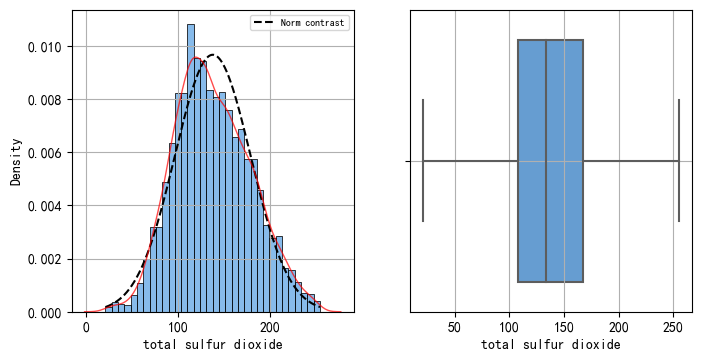

In [10]:
fig , axes = plt.subplots(1 , 2 , figsize = (8 , 4) , dpi = 100)
fig.patch.set_facecolor("white") #* 设置背景 以免保存的图片背景虚化

DS.Numerical_autoplt(processed_df_1.iloc[: ,0] , ax1 = axes[0] , ax2 = axes[1]) # 数值型的两个图